## Model 2-Random forest Classifier


In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("HR_clean.csv")
df.head(10)

,Unnamed: 0,satisfaction_level,last_evaluation_score,project_count,average_monthly_hours,years_of_working,workplace_acciedent_count,employment_status,promotion_last_5years,department,salary_range,Score_variance
0,0,0.38,0.53,2,157,3,0,1,0,sales,low,0.15
1,2,0.11,0.88,7,272,4,0,1,0,sales,medium,0.77
2,3,0.72,0.87,5,223,5,0,1,0,sales,low,0.15
3,4,0.37,0.52,2,159,3,0,1,0,sales,low,0.15
4,5,0.41,0.50,2,153,3,0,1,0,sales,low,0.09
5,6,0.10,0.77,6,247,4,0,1,0,sales,low,0.67
6,7,0.92,0.85,5,259,5,0,1,0,sales,low,-0.07
7,8,0.89,1.00,5,224,5,0,1,0,sales,low,0.11
8,9,0.42,0.53,2,142,3,0,1,0,sales,low,0.11
9,10,0.45,0.54,2,135,3,0,1,0,sales,low,0.09


In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
df.head(10)

,satisfaction_level,last_evaluation_score,project_count,average_monthly_hours,years_of_working,workplace_acciedent_count,employment_status,promotion_last_5years,department,salary_range,Score_variance
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.15
1,0.11,0.88,7,272,4,0,1,0,sales,medium,0.77
2,0.72,0.87,5,223,5,0,1,0,sales,low,0.15
3,0.37,0.52,2,159,3,0,1,0,sales,low,0.15
4,0.41,0.50,2,153,3,0,1,0,sales,low,0.09
5,0.10,0.77,6,247,4,0,1,0,sales,low,0.67
6,0.92,0.85,5,259,5,0,1,0,sales,low,-0.07
7,0.89,1.00,5,224,5,0,1,0,sales,low,0.11
8,0.42,0.53,2,142,3,0,1,0,sales,low,0.11
9,0.45,0.54,2,135,3,0,1,0,sales,low,0.09


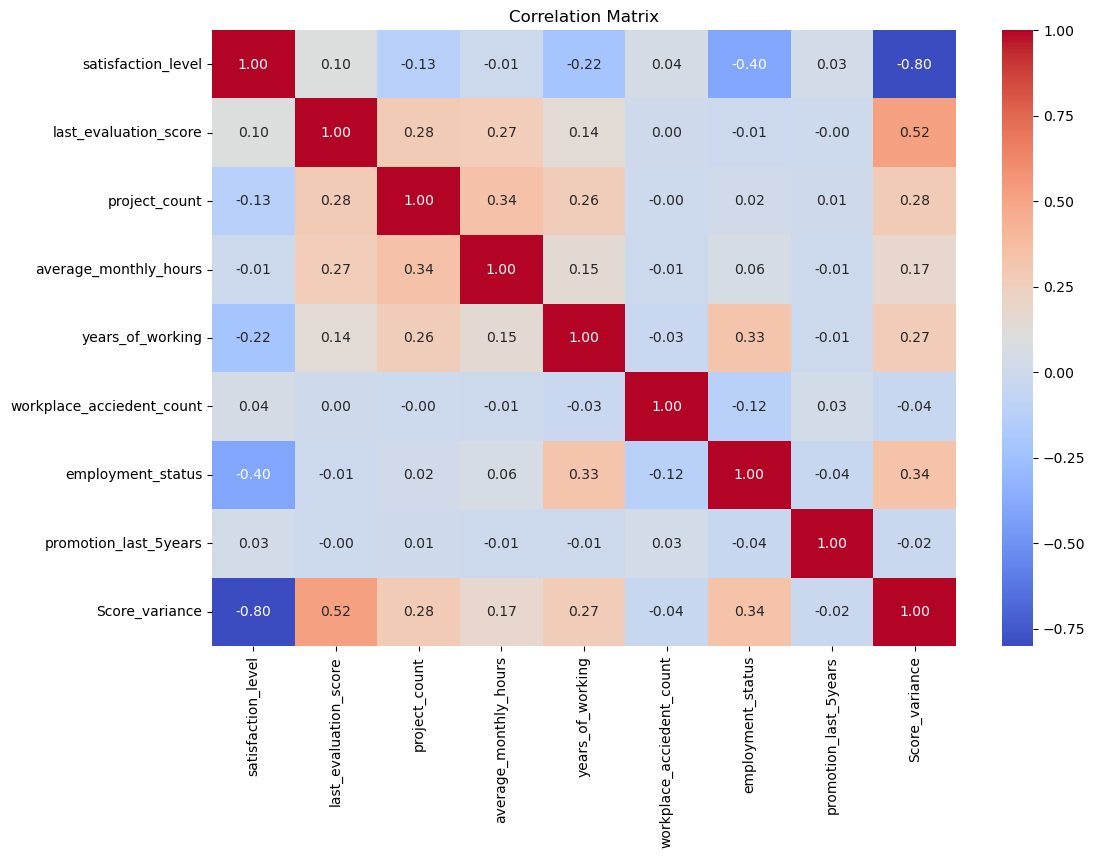

In [5]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [6]:
df.columns

Index(['satisfaction_level', 'last_evaluation_score', 'project_count',
       'average_monthly_hours', 'years_of_working',
       'workplace_acciedent_count', 'employment_status',
       'promotion_last_5years', 'department', 'salary_range',
       'Score_variance'],
      dtype='object')

In [7]:
x = df.drop("employment_status", axis=1)
y = df["employment_status"]


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 
categorical_features = ["department", "salary_range"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ([(
                                    "one_hot",
                                    one_hot,
                                    categorical_features,)],
                                    remainder = "passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.15],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.77],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.15],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.6 ],
       [1.  , 0.  , 0.  , ..., 1.  , 0.  , 0.23],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.23]])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [64]:
model1 = RandomForestClassifier()

In [65]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split (transformed_x, y,test_size=0.2)
model1.fit(x_train, y_train)

RandomForestClassifier()

In [66]:
model1.score(x_test, y_test)

0.9834377797672337

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model1.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.98      0.92      0.95       388

    accuracy                           0.98      2234
   macro avg       0.98      0.96      0.97      2234
weighted avg       0.98      0.98      0.98      2234



In [68]:
y_pred = model1.predict(x_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

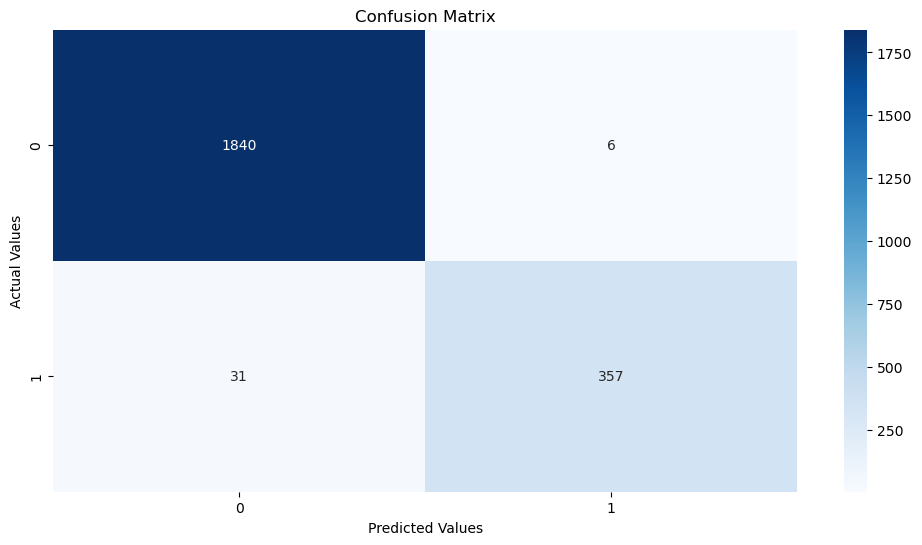

In [69]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

## Model Validation using KFold validation

In [81]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True, random_state=42)
for train_index, test_index in kf.split(df):
    train_data, test_data = df.iloc[train_index], df.iloc[test_index]
    print(train_index, test_index)


[    0     1     2 ... 11163 11164 11166] [    3    14    33 ... 11160 11161 11165]
[    1     2     3 ... 11164 11165 11166] [    0     8    10 ... 11125 11130 11138]
[    0     1     2 ... 11163 11164 11165] [   12    17    20 ... 11139 11155 11166]
[    0     1     2 ... 11164 11165 11166] [   45    48    65 ... 11106 11140 11150]
[    0     1     2 ... 11164 11165 11166] [   26    27    28 ... 11119 11121 11129]
[    0     1     2 ... 11164 11165 11166] [   15    44    53 ... 11143 11144 11163]
[    0     1     3 ... 11164 11165 11166] [    2    18    25 ... 11145 11159 11162]
[    0     1     2 ... 11164 11165 11166] [    6     7    22 ... 11131 11156 11158]
[    0     2     3 ... 11163 11165 11166] [    1    11    13 ... 11151 11154 11164]
[    0     1     2 ... 11164 11165 11166] [    4     5     9 ... 11147 11152 11157]


In [82]:
def getscore(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [83]:
getscore(RandomForestClassifier(),x_train, x_test, y_train, y_test)

0.9843330349149507

In [84]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
from sklearn.preprocessing import LabelEncoder
y = df['employment_status']

le = LabelEncoder()
y_encoded = le.fit_transform(y)
model = RandomForestClassifier()
cv_scores = cross_val_score(model, transformed_x, y_encoded, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Score:", cv_scores.mean())

Cross-Validation Scores: [0.98522829 0.98075201 0.98343036 0.98298253 0.98343036]
Mean Score: 0.9831647129149677


In [88]:
print(cross_val_score(model1, transformed_x, y, cv=10))

[0.98388541 0.99015219 0.98388541 0.97761862 0.9820949  0.98478066
 0.98657117 0.9811828  0.98028674 0.9874552 ]


In [90]:
scores = cross_val_score(model1, transformed_x, y, cv=10)
print(np.mean(scores))

0.9836122582570441
